In [2]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Model2_lifestyle/heart_cleaned.csv')

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [7]:
df.shape

(319795, 18)

## data exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
#all rows control for null values
df.isna().values.any()

False

In [11]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

#### removing duplicate values

In [12]:
df.duplicated().sum()

18078

In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
df['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

In [15]:
df.shape

(301717, 18)

#### Data Analysis & Visualization using Seaborn Library, pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

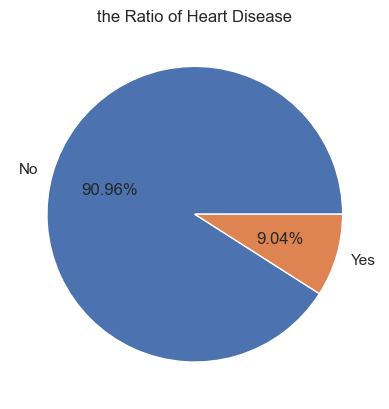

In [16]:
#show Ratio of HeartDisease from data
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

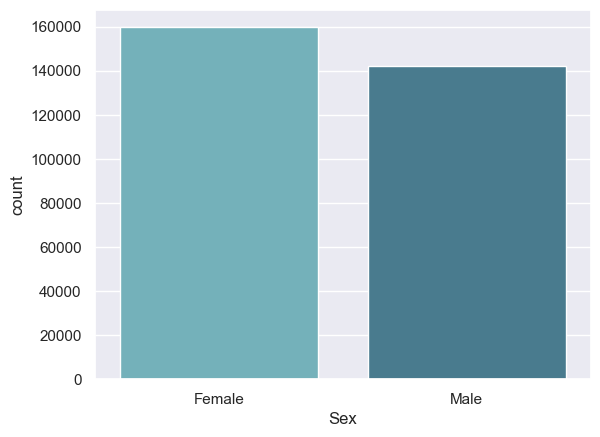

In [17]:
#show how many of Male and female 
sns.countplot(x = df['Sex'], palette='GnBu_d')
plt.show()

In [18]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

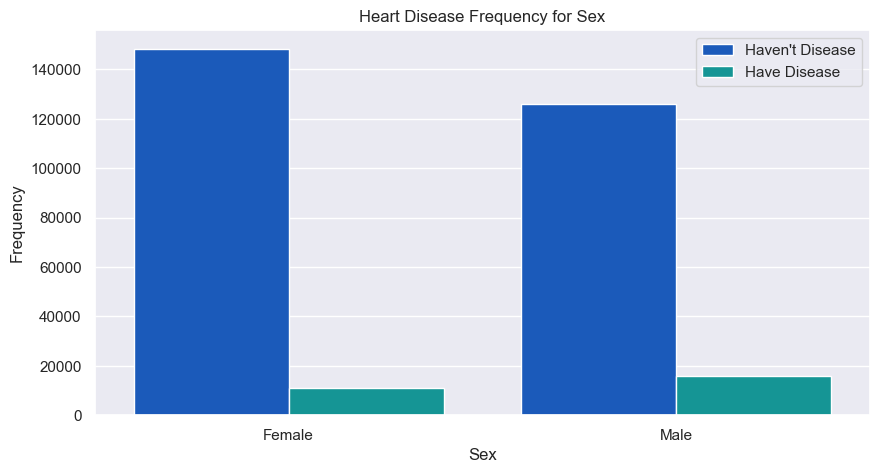

In [19]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [20]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

In [21]:
df.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              19868
             Yes               130
25-29        No              16179
             Yes               133
30-34        No              17727
             Yes               226
35-39        No              19230
             Yes               296
40-44        No              19351
             Yes               486
45-49        No              19775
             Yes               743
50-54        No              22353
             Yes              1383
55-59        No              25411
             Yes              2199
60-64        No              27898
             Yes              3321
65-69        No              27596
             Yes              4074
70-74        No              24456
             Yes              4817
75-79        No              16686
             Yes              4027
80 or older  No              17926
             Yes              5426
Name: HeartDisease, dtype: int64

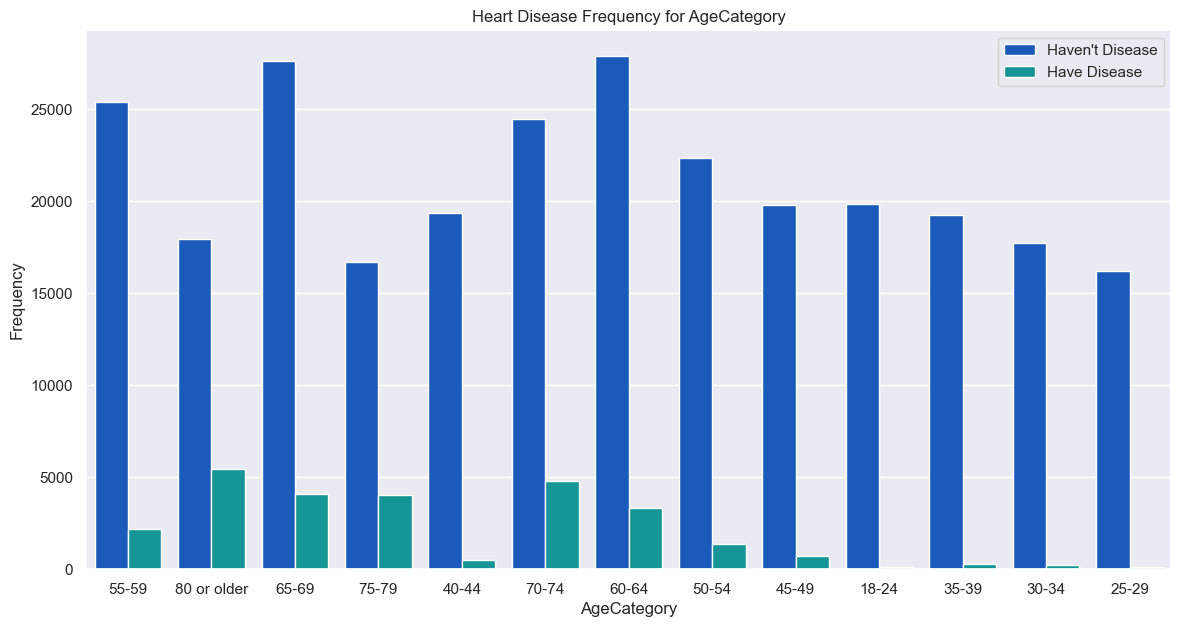

In [22]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [23]:
#the count of people Smoking
df['Smoking'].value_counts()

Smoking
No     174312
Yes    127405
Name: count, dtype: int64

In [24]:
df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              7963
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5746
                                              ... 
Male    75-79        Yes      Yes             1552
        80 or older  No       No              2905
                              Yes             1086
                     Yes      No              3512
                              Yes             1724
Name: HeartDisease, Length: 104, dtype: int64

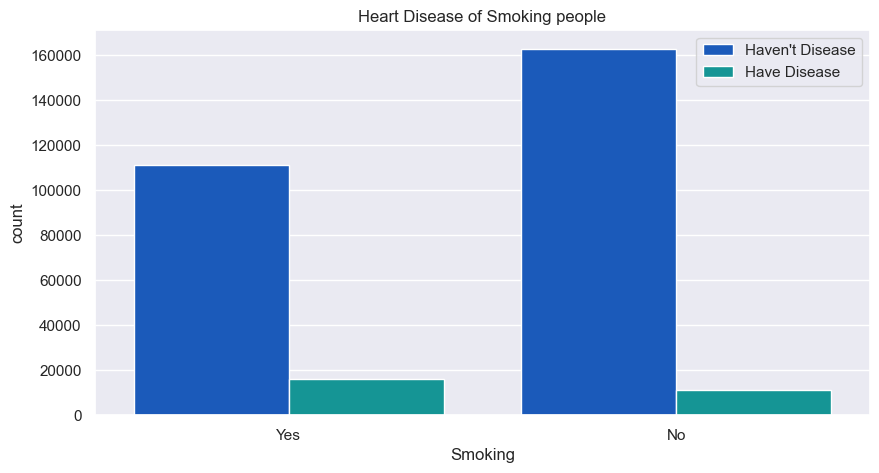

In [25]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [26]:
# I want to Know how many people drink the AlcoholDrinking or not 
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     280136
Yes     21581
Name: count, dtype: int64

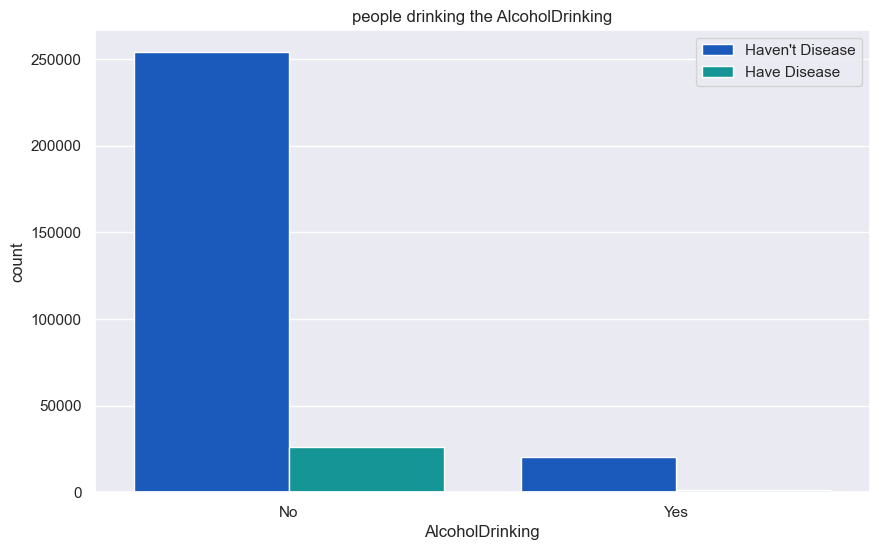

In [27]:
#Show how many people drink the AlcoholDrinking or not 
plt.figure(figsize=(10,6))
sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [28]:
#I want to know how many people have KidneyDisease
df['KidneyDisease'].value_counts()

KidneyDisease
No     289941
Yes     11776
Name: count, dtype: int64

In [29]:
#show the peolple who have KidneyDisease and HeartDisease
df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

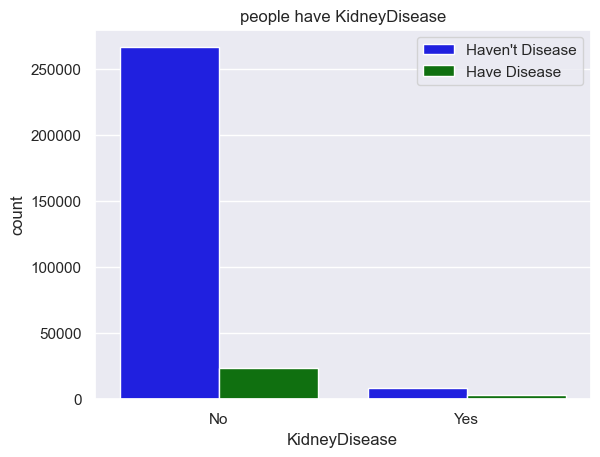

In [30]:
sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

In [31]:
df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               153218
        Yes                6453
Male    No               136723
        Yes                5323
Name: KidneyDisease, dtype: int64

In [32]:
#Show the SkinCancer  
df['SkinCancer'].value_counts()

SkinCancer
No     272425
Yes     29292
Name: count, dtype: int64

In [33]:
#Show people have SkinCancer
df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            144876
        Yes            14795
Male    No            127549
        Yes            14497
Name: SkinCancer, dtype: int64

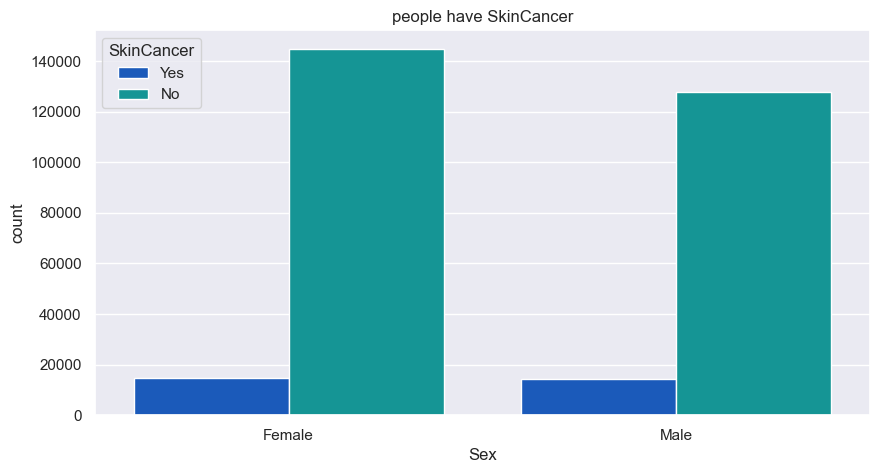

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')
plt.show()

In [35]:
df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              135339
                    Yes               9537
        Yes         No               13119
                    Yes               1676
Male    No          No              114793
                    Yes              12756
        Yes         No               11205
                    Yes               3292
Name: HeartDisease, dtype: int64

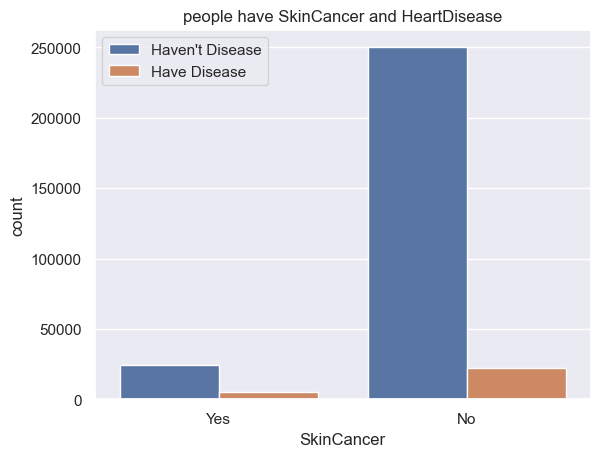

In [36]:
sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

#### Check the Distribution and skewness of the features

In [37]:
label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [38]:
x = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=42) 

In [40]:
Clf = DecisionTreeClassifier()
Clf.fit(xtrain,ytrain) 
Clf.score(xtest,ytest) # after sampling

0.8539263776569889

In [41]:
Clf.score(x,y) 

0.9544473794980064

#### over sampling

In [42]:
over = RandomOverSampler(random_state=42)
x_new , y_new = over.fit_resample(x,y)
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.70,random_state=42)
dt = DecisionTreeClassifier() 
dt.fit(xtrain,ytrain)
dt.score(xtest,ytest) # after sampling

0.9486622053268883

In [43]:
dt.score(xtrain,ytrain) # after sampling

0.9979361749748854

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = dt.predict(xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))

print("\nClassification Report:")
print(classification_report(ytest, y_pred))

print("\nAUC-ROC Score:")
print(roc_auc_score(ytest, dt.predict_proba(xtest)[:, 1]))


Confusion Matrix:
[[73768  8375]
 [   79 82452]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     82143
           1       0.91      1.00      0.95     82531

    accuracy                           0.95    164674
   macro avg       0.95      0.95      0.95    164674
weighted avg       0.95      0.95      0.95    164674


AUC-ROC Score:
0.949439586427898


### Random Forest

In [45]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979361749748854
Testing accuracy: 0.9642505799336871


In [46]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7884852617388182
Testing accuracy: 0.7823517980980604


#### K Fold Cross Validation

In [47]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data
result = cross_val_score(xgb, x_new, y_new, cv=kfold)

In [48]:
result

array([0.78184236, 0.78455681, 0.78483722, 0.78102968, 0.78236869])

In [49]:
result.mean()

0.782926952689568

In [50]:
result.max()

0.7848372228598495

In [51]:
result.min()

0.7810296769962289

#### Extra Trees Classifier fro feture selection

In [52]:
extr = ExtraTreesClassifier()
extr.fit(x_new,y_new)

ExtraTreesClassifier()

In [53]:
extr.feature_importances_ # IG from decision tree

array([0.24168351, 0.01933232, 0.00890267, 0.03132774, 0.07093299,
       0.06523648, 0.0445704 , 0.02465745, 0.1858011 , 0.03705499,
       0.0393394 , 0.01781612, 0.06689235, 0.10315752, 0.01491099,
       0.01466179, 0.01372217])

In [54]:
feature_importance = extr.feature_importances_
feature_importance #info gain

array([0.24168351, 0.01933232, 0.00890267, 0.03132774, 0.07093299,
       0.06523648, 0.0445704 , 0.02465745, 0.1858011 , 0.03705499,
       0.0393394 , 0.01781612, 0.06689235, 0.10315752, 0.01491099,
       0.01466179, 0.01372217])

In [55]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp

,Gain_Score
0,0.241684
1,0.019332
2,0.008903
3,0.031328
4,0.070933
5,0.065236
6,0.044570
7,0.024657
8,0.185801
9,0.037055


In [56]:
x_new.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [57]:
cols = pd.DataFrame(x_new.columns, columns=['Feature_Names'])
cols

,Feature_Names
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth
5,MentalHealth
6,DiffWalking
7,Sex
8,AgeCategory
9,Race


In [58]:
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,BMI,0.241684
1,Smoking,0.019332
2,AlcoholDrinking,0.008903
3,Stroke,0.031328
4,PhysicalHealth,0.070933
5,MentalHealth,0.065236
6,DiffWalking,0.044570
7,Sex,0.024657
8,AgeCategory,0.185801
9,Race,0.037055


In [59]:
gains.nlargest(15,'Gain_Score') #smallest()

,Feature_Names,Gain_Score
0,BMI,0.241684
8,AgeCategory,0.185801
13,SleepTime,0.103158
4,PhysicalHealth,0.070933
12,GenHealth,0.066892
5,MentalHealth,0.065236
6,DiffWalking,0.044570
10,Diabetic,0.039339
9,Race,0.037055
3,Stroke,0.031328


In [60]:
# Create a random forest regressor model
rf = RandomForestClassifier()

# Fit the model to your data
rf.fit(x_new, y_new)

# Retrieve feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': x_new.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the ranked feature importances
print(feature_importances)

             Feature  Importance
0                BMI    0.285029
8        AgeCategory    0.192119
13         SleepTime    0.085913
12         GenHealth    0.069430
4     PhysicalHealth    0.065014
5       MentalHealth    0.056844
6        DiffWalking    0.039984
10          Diabetic    0.033402
9               Race    0.031984
3             Stroke    0.027078
7                Sex    0.025482
11  PhysicalActivity    0.019109
1            Smoking    0.017499
14            Asthma    0.015917
16        SkinCancer    0.013610
15     KidneyDisease    0.012408
2    AlcoholDrinking    0.009177


In [61]:
df.drop([ 'KidneyDisease','SkinCancer','AlcoholDrinking'], axis=1, inplace = True)

#### dimantionally reduction using pca

In [62]:
mmx = MinMaxScaler()
xtrain = mmx.fit_transform(xtrain)
xtest = mmx.transform(xtest)

In [63]:
xtrain

array([[0.24285318, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.45545379, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22647794, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.45378851, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34998612, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.16458507, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
# Apply chi-square feature selection
kbest = SelectKBest(chi2, k=14)  # Select top 10 features
xtrain_kbest = kbest.fit_transform(xtrain, ytrain)
xtest_kbest = kbest.transform(xtest)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 principal components
xtrain_pca = pca.fit_transform(xtrain_kbest)
xtest_pca = pca.transform(xtest_kbest)
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(xtrain_pca, ytrain)

# Make predictions on the test set
y_pred = rf_classifier.predict(xtest_pca)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9348166680836076


#### Linear SGDClassifier

In [65]:
from sklearn.linear_model import SGDClassifier
# Create an instance of SGDClassifier
lsgd = SGDClassifier()

# Fit the model to the training data
lsgd.fit(xtrain, ytrain)

# Evaluate the model on the testing data
testing_score = lsgd.score(xtest, ytest)
print("Testing score:", testing_score)

# Evaluate the model on the training data
training_score = lsgd.score(xtrain, ytrain)
print("Training score:", training_score)

Testing score: 0.7470274603155325
Training score: 0.748143077988122


#### KNeighborsClassifier

In [66]:
# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

Testing score: 0.7610065948480027
Training score: 0.7664546452979664


#### XGBClassifier

In [67]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.7884852617388182
Testing accuracy: 0.7823517980980604


#### RandomForestClassifier

In [68]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979309698676341
Testing accuracy: 0.9642566525377413


#### ExtraTreesClassifier

In [69]:
# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.9719749322904648
Training Score: 0.9979361749748854


#### DecisionTreeClassifier

In [70]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier() 

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

Testing Score: 0.948637914910672
Training Score: 0.9979361749748854


#### LogisticRegression

In [71]:
# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.7464566355344499
Training Score: 0.7476668106746339


In [72]:
from sklearn.neural_network import MLPClassifier
# Create the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', random_state=42)

# Train the classifier
clf.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = clf.score(xtest, ytest)
print("Testing Score:", test_score)

# Calculate the accuracy score on the training data
train_score = clf.score(xtrain, ytrain)
print("Training Score:", train_score)


# Make predictions on the testing set
y_pred = clf.predict(xtest)

# Calculate accuracy of the classifier
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Testing Score: 0.7562274554574493
Training Score: 0.7580067562292121
Accuracy: 0.7562274554574493


#### classification model

In [73]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier()
    #'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Decision Tree Accuracy: 0.9488
Random Forest Accuracy: 0.9643
Logistic Regression Accuracy: 0.7465
ExtraTreesClassifier Accuracy: 0.9719
XGBClassifier Accuracy: 0.7824


#### Ensemble

In [74]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))
from sklearn.ensemble import AdaBoostClassifier

# Boosting
boosting_model = AdaBoostClassifier(random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))

Bagging Accuracy: 0.9640016031674703
Boosting Accuracy: 0.7582010517750222
Stacking Accuracy: 0.9481581791904005


#### Modeling

In [76]:
def evaluate_model(model, xtest, ytest):
   
    # Predict Test Data 
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [77]:
xtrain

array([[-0.76049382, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [ 0.64561895, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.86879755, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       ...,
       [ 0.63460502,  1.00900373, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276],
       [-0.05193047, -0.99107662, -0.249487  , ...,  2.30361331,
        -0.29095031, -0.39599276],
       [-1.27814892, -0.99107662, -0.249487  , ..., -0.43410063,
        -0.29095031, -0.39599276]])

In [79]:
 rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

Accuracy: 0.9641837812890924
Precision: 0.9339501908332106
Recall: 0.999200300493148
F1 Score: 0.9654740440677172
Cohens Kappa Score: 0.9283553434079117
Area Under Curve: 0.9965441307844028
Confusion Matrix:
 [[76311  5832]
 [   66 82465]]


In [80]:
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

Accuracy: 0.9720356583310055
Precision: 0.9478505747126437
Recall: 0.9991760671747586
F1 Score: 0.9728368263031539
Cohens Kappa Score: 0.9440638526966137
Area Under Curve: 0.9970970549371005
Confusion Matrix:
 [[77606  4537]
 [   68 82463]]


In [81]:
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.7823517980980604
Precision: 0.7597178648510335
Recall: 0.8274224230895058
F1 Score: 0.7921260664551639
Cohens Kappa Score: 0.564609541608373
Area Under Curve: 0.8612647294051956
Confusion Matrix:
 [[60545 21598]
 [14243 68288]]


In [82]:
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.9641837812890924
Precision: 0.9339501908332106
Recall: 0.999200300493148
F1 Score: 0.9654740440677172
Cohens Kappa Score: 0.9283553434079117
Area Under Curve: 0.9965441307844028
Confusion Matrix:
 [[76311  5832]
 [   66 82465]]


In [83]:
clf = MLPClassifier(random_state=42)

# Train the classifier
clf.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = clf.score(xtest, ytest)
print("Testing Score:", test_score)

# Calculate the accuracy score on the training data
train_score = clf.score(xtrain, ytrain)
print("Training Score:", train_score)


# Make predictions on the testing set
y_pred = clf.predict(xtest)

# Calculate accuracy of the classifier
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Testing Score: 0.7690831582399165
Training Score: 0.7732082719564437
Accuracy: 0.7690831582399165


In [84]:
import pickle

# Save model
with open('extratrees_model.pkl', 'wb') as file:
    pickle.dump(extra, file)

print("Model saved successfully!")

Model saved successfully!


In [85]:
# Load model
with open('extratrees_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict using the loaded model
y_pred = loaded_model.predict(xtest)

# Confirm it's working
from sklearn.metrics import accuracy_score
print("Loaded Model Accuracy:", accuracy_score(ytest, y_pred))


Loaded Model Accuracy: 0.9720356583310055


In [88]:
df

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,0,223,1,0,3,30,0,0,7,5,2,1,4,4,1
1,0,524,0,1,0,0,0,0,12,5,0,1,4,6,0
2,0,1103,1,0,20,30,0,1,9,5,2,1,1,7,1
3,0,883,0,0,0,0,0,0,11,5,0,0,2,5,0
4,0,837,0,0,28,0,1,0,4,5,0,1,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,7,0,1,1,8,3,2,0,1,5,1
319791,0,1397,1,0,0,0,0,1,3,3,0,1,4,4,1
319792,0,886,0,0,0,0,0,0,5,3,0,1,2,5,0
319793,0,1658,0,0,0,0,0,0,1,3,0,0,2,11,0


In [90]:
df['GenHealth'].unique()

array([4, 1, 2, 3, 0])

In [101]:
import pickle
import numpy as np

def calculate_bmi(weight_kg, height_cm):
    height_m = height_cm / 100
    return weight_kg / (height_m ** 2)

def predict_heart_disease():
    # Load the trained ExtraTrees model
    # with open('extratrees_model.pkl', 'rb') as file:
    #     model = pickle.load(file)
    model = loaded_model
    threshold=0.5

    print("🔍 Enter your health and lifestyle details below:")

    # Get user inputs
    weight = float(input("Weight (in kg): "))
    height = float(input("Height (in cm): "))
    bmi = calculate_bmi(weight, height)

    smoking = int(input("Do you smoke? (1 = Yes, 0 = No): "))
    stroke = int(input("Have you ever had a stroke? (1 = Yes, 0 = No): "))
    diff_walking = int(input("Do you have difficulty walking? (1 = Yes, 0 = No): "))
    physical_health = int(input("Number of physically unhealthy days in last 30 days (0-30): "))
    mental_health = int(input("Number of mentally unhealthy days in last 30 days (0-30): "))
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    age_category = int(input("Age Group (e.g., 18-24:1, 25-29:2, ..., 80+:13): "))
    race = int(input("Race (0=Other, 1=American Indian/Alaskan Native, 2=Black, 3=Asian, 4=Hispanic, 5=White): "))
    diabetic = int(input("Are you diabetic? (1 = Yes, 0 = No): "))
    physical_activity = int(input("Do you engage in physical activity? (1 = Yes, 0 = No): "))
    general_health = int(input("General Health (0=Poor, 1=Fair, 2=Good, 3=Very Good, 4=Excellent): "))
    sleep_time = float(input("Average hours of sleep per night: "))
    asthma = int(input("Do you have asthma? (1 = Yes, 0 = No): "))

    # Set default values
    alcohol_drinking = 0
    kidney_disease = 0
    skin_cancer = 0

    # Create feature vector (order should match training)
    input_features = np.array([[
        bmi, smoking, alcohol_drinking, stroke,
        physical_health, mental_health, diff_walking,
        sex, age_category, race, diabetic,
        physical_activity, general_health, sleep_time,
        asthma, kidney_disease, skin_cancer
    ]])

     # Prediction and probability
    prob = model.predict_proba(input_features)[0][1]
    prediction = int(prob >= threshold)

    print("\n🔎 Prediction Result:")
    if prediction == 1:
        print("⚠️ You may be at risk of heart disease. Please consult a healthcare professional.")
    else:
        print("✅ No immediate risk of heart disease detected. Stay healthy!")

    print(f"Model confidence: {prob:.2%} likelihood of heart disease.")

    if 0.4 <= prob <= 0.6:
        print("🟡 This is a borderline case. It is recommended to review your health parameters or consult a doctor.")



In [104]:
predict_heart_disease()

🔍 Enter your health and lifestyle details below:


Weight (in kg):  120
Height (in cm):  160
Do you smoke? (1 = Yes, 0 = No):  1
Have you ever had a stroke? (1 = Yes, 0 = No):  1
Do you have difficulty walking? (1 = Yes, 0 = No):  1
Number of physically unhealthy days in last 30 days (0-30):  30
Number of mentally unhealthy days in last 30 days (0-30):  30
Sex (1 = Male, 0 = Female):  1
Age Group (e.g., 18-24:1, 25-29:2, ..., 80+:13):  10
Race (0=Other, 1=American Indian/Alaskan Native, 2=Black, 3=Asian, 4=Hispanic, 5=White):  5
Are you diabetic? (1 = Yes, 0 = No):  1
Do you engage in physical activity? (1 = Yes, 0 = No):  0
General Health (0=Poor, 1=Fair, 2=Good, 3=Very Good, 4=Excellent):  0
Average hours of sleep per night:  2
Do you have asthma? (1 = Yes, 0 = No):  1



🔎 Prediction Result:
✅ No immediate risk of heart disease detected. Stay healthy!
Model confidence: 44.00% likelihood of heart disease.
🟡 This is a borderline case. It is recommended to review your health parameters or consult a doctor.
